In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = "3Dbulk-inclusion2-gs5-075"
filename_back = "3Dbulk-fondo-gs5-b"
sphere_pos = (-1.9, 0, 0.75)
sphere_size =  0.595

In [3]:
grid_size = 5
thickness = 5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
bulk3d = full((size_lat,size_lat,size_depth),1,dtype=int) 
bulk3d.shape[0]

100

In [4]:
bulk_flat_back = bulk3d.reshape(1,size_lat*size_lat*size_depth)
bulk_flat_back.shape
with open(filename_back,"wb") as f:
                savetxt(f, bulk_flat_back, fmt='%i', delimiter=" ")

In [5]:
voxel_inside = 0
for x in range(size_lat):
    for y in range(size_lat):
        for z in range(size_depth):
            pos_x = float(x) / grid_size - 2*thickness
            pos_y = float(y) / grid_size - 2*thickness
            pos_z = float(z) / grid_size
            if (((pos_x - sphere_pos[0])**2  + (pos_y - sphere_pos[1])**2 + (pos_z - sphere_pos[2])**2) < sphere_size**2):
                bulk3d[x,y,z] = 2
                voxel_inside += 1
print(voxel_inside, bulk3d.size)


112 250000


In [6]:
bulk_flat = bulk3d.T.reshape(1,size_lat*size_lat*size_depth)
bulk_flat.shape

(1, 250000)

In [7]:
with open(filename,"wb") as f:
                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

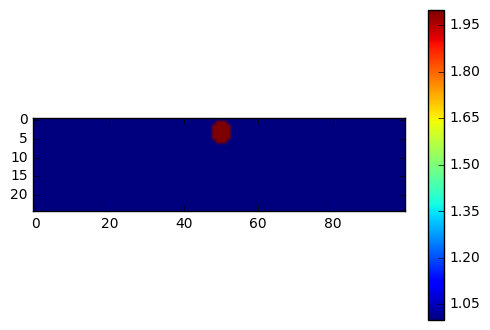

In [8]:
from matplotlib import pyplot as plt
slice_z = sphere_pos[2] * grid_size
slice_x = sphere_pos[0] * grid_size + 2*thickness
plt.imshow(bulk3d[40,:,:].T,vmin=1,vmax=2)
cbar = plt.colorbar()